In [1]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de datos
df = pd.read_csv('cleaned_glass.csv')

<br>
<h3 align='center'>Preparación de los datos 👈</h3>

In [3]:
# Separamos los datos numéricos
numeric = df.select_dtypes(include=np.number).columns.to_list()

# Eliminamos las columnas index y Type
numeric.remove('index')
numeric.remove('Type')

# Declaramos X e Y
x = df[numeric]
y = df['Type']

# Seteamos el conjunto de datos de entrenamiento y de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

<br>
<h3 align='center'>Pipelines 👈</h3>

In [4]:
# Pipeline variables numéricas
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', StandardScaler())
])

# Pipeline de paso-preproceso
preprocessing_pipeline = ColumnTransformer([
    #('nominal_preprocessor', nominal_pipeline, nominal),
    #('ordinal_preprocessor', ordinal_pipeline, ordinal),
    ('numeric_preprocessor', numeric_pipeline, numeric)
])


<br>
<h3 align='center'>Modelo: Random Forest 👈</h3>

In [5]:
# Creamos el modelo
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo con los hiperparámetros obtenidos en el model_selection
rf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=None, min_impurity_decrease=0,
                            min_samples_leaf=1, max_leaf_nodes=None, min_samples_split=2, min_weight_fraction_leaf=0,
                            max_features=0.5, n_estimators=512, n_jobs=1,
                            random_state=1, warm_start=True)

# Implementación del pipeline completo
complete_pipeline_rf = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', rf)
])

<br>
<h3 align='center'>Resultados 👈</h3>

In [6]:
# Entrenamiento y testeo
complete_pipeline_rf.fit(x_train, y_train)
y_pred_rf = complete_pipeline_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.69      0.75      0.72        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.73      0.74      0.72        43



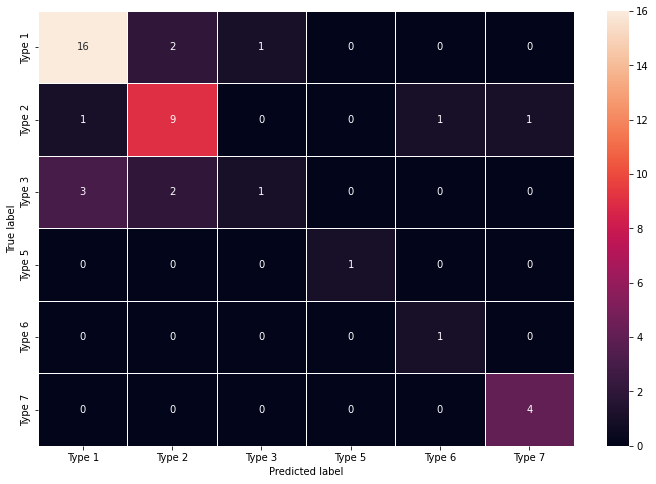

In [7]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<h4 align="center">Observaciones 🕵️​ </h4>
<p>
    <li>Obtuvimos un accuracy cerca del 74%. Es lo que esperabamos cuando realizamos la selección del modelo con Auto-ML.</li>
    <br>
    <li>Este porcentaje se puede visualizar en la matriz de confusión, donde observamos si el tipo predicho corresponde al verdadero tipo que debe ser en realidad.</li>
    <br>
    <li>Al tener pocos datos se puede ver reflejado el "bajo" accuracy que obtuvimos. Sin embargo, si se incrementara la cantidad de datos en el dataset, podríamos volver a seleccionar otro modelo (o el mismo), y  así obtener mejores resultados.</li>
    <br>
</p>